In [4]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs=25)


Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1783 - accuracy: 0.9321
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1795 - accuracy: 0.9313
Epoch 3/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1749 - accuracy: 0.9327
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1723 - accuracy: 0.9344
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1664 - accuracy: 0.9355
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1687 - accuracy: 0.9352
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1653 - accuracy: 0.9375
Epoch 8/25
1309/1875 [===================>..........] - ETA: 1s - loss: 0.1639 - accuracy: 0.9378

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3965 - accuracy: 0.8821

Test accuracy: 0.882099986076355


In [13]:
!pip install mlxtend

In [17]:
y_predict=model.predict_classes(test_images)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


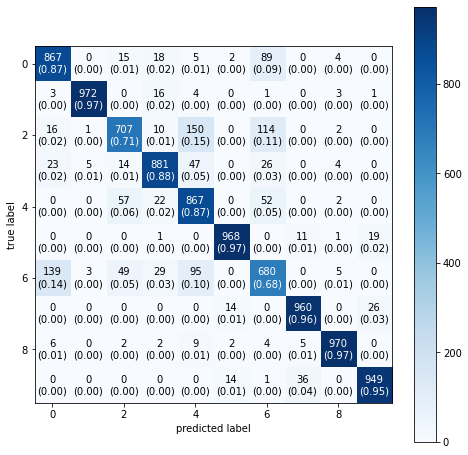

In [34]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat =confusion_matrix(test_labels,y_predict)
plot_confusion_matrix(conf_mat=mat,figsize=(8,8),show_normed=True,colorbar=True)
plt.show()

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

]
Generating train examples...: 100%|█████████▉| 59820/60000 [00:43<00:00, 2226.33 examples/s]
                                                                                            
Generating test examples...:  98%|█████████▊| 9817/10000 [00:05<00:00, 2048.31 examples/s]
                                                                                          
Shuffling fashion_mnist-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]
Dataset fashion_mnist downloaded and prepared to /home/saeed/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

#train_dataset =  train_dataset.cache()
#test_dataset  =  test_dataset.cache()

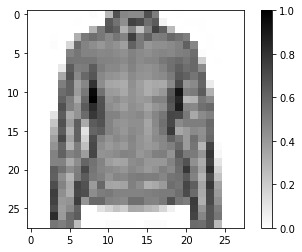

In [ ]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

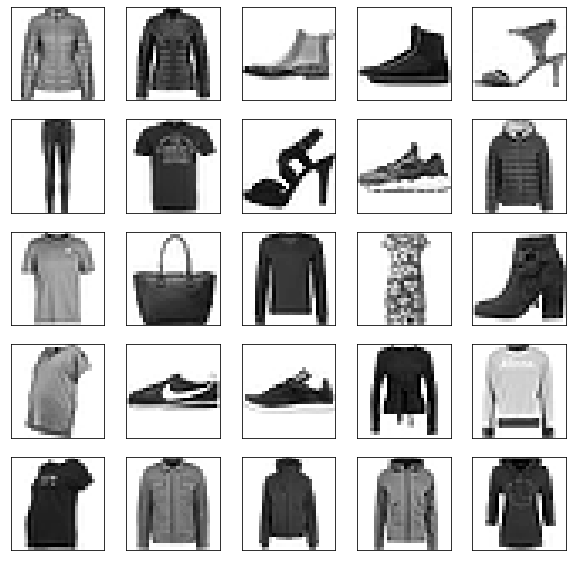

In [ ]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [ ]:
print (train_dataset)

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hist = model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(60000/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2572 - accuracy: 0.9270
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1127 - accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0776 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0583 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0470 - accuracy: 0.9856


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0829 - accuracy: 0.9748
Accuracy on test dataset: 0.9747999906539917


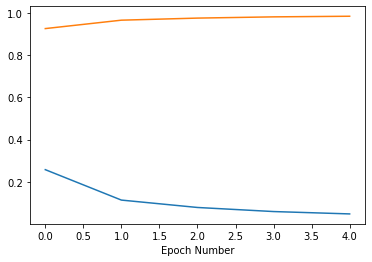

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.plot(hist.history['loss']);
plt.plot(hist.history['accuracy']);

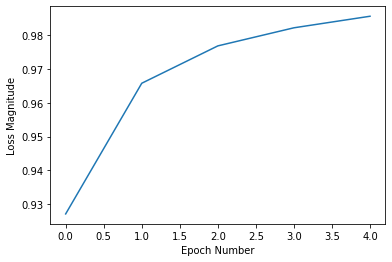

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(hist.history['accuracy']);

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\ibrah\AppData\Local\Temp\tmpzms10img\assets
INFO:tensorflow:Assets written to: C:\Users\ibrah\AppData\Local\Temp\tmpzms10img\assets


In [ ]:
tflite_model_file = "mnist_model.tflite"
open(tflite_model_file, 'wb').write(tflite_model)

408584